In [1]:
import pandas as pd

In [46]:
df=pd.read_csv('/content/Train_Data (3).csv')

In [3]:
df.head()

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,DOWNMODDED FOR IRRELEVANCE? ISN'T THAT HOW THI...,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"THAT WAS SUPPOSED TO MEAN "" BY A PLACE WHERE P...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,I THOUGHT EVERYONE DID; ITS FUCKING DELICIOUS :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"Great work, Zhesbe! I'd give you a raise but y...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348


In [4]:
df.describe()

,controversiality,parent_score,parent_votes,parent_controversiality,Score
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,0.000600,216.714943,216.714943,0.001200,89.810962
std,0.024492,449.422467,449.422467,0.034627,200.739917
min,0.000000,-8907.000000,-8907.000000,0.000000,-1658.000000
25%,0.000000,13.000000,13.000000,0.000000,-10.000000
50%,0.000000,67.000000,67.000000,0.000000,66.000000
75%,0.000000,229.000000,229.000000,0.000000,115.500000
max,1.000000,5619.000000,5619.000000,1.000000,3133.000000


In [5]:
df.shape

(4999, 9)

In [12]:
df['controversiality'].value_counts()

0    4996
1       3
Name: controversiality, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


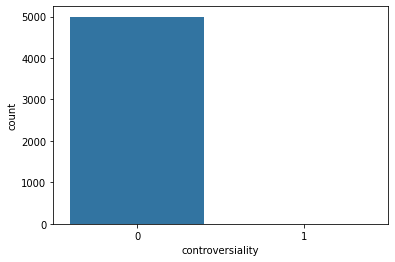

In [8]:
sns.countplot(df['controversiality'])

In [13]:
df.isnull().sum()

text                       0
author                     0
controversiality           0
parent_text                0
parent_score               0
parent_votes               0
parent_author              0
parent_controversiality    0
Score                      0
dtype: int64

# Author's Word Cloud


In [16]:
train_qs = pd.Series(df['author'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

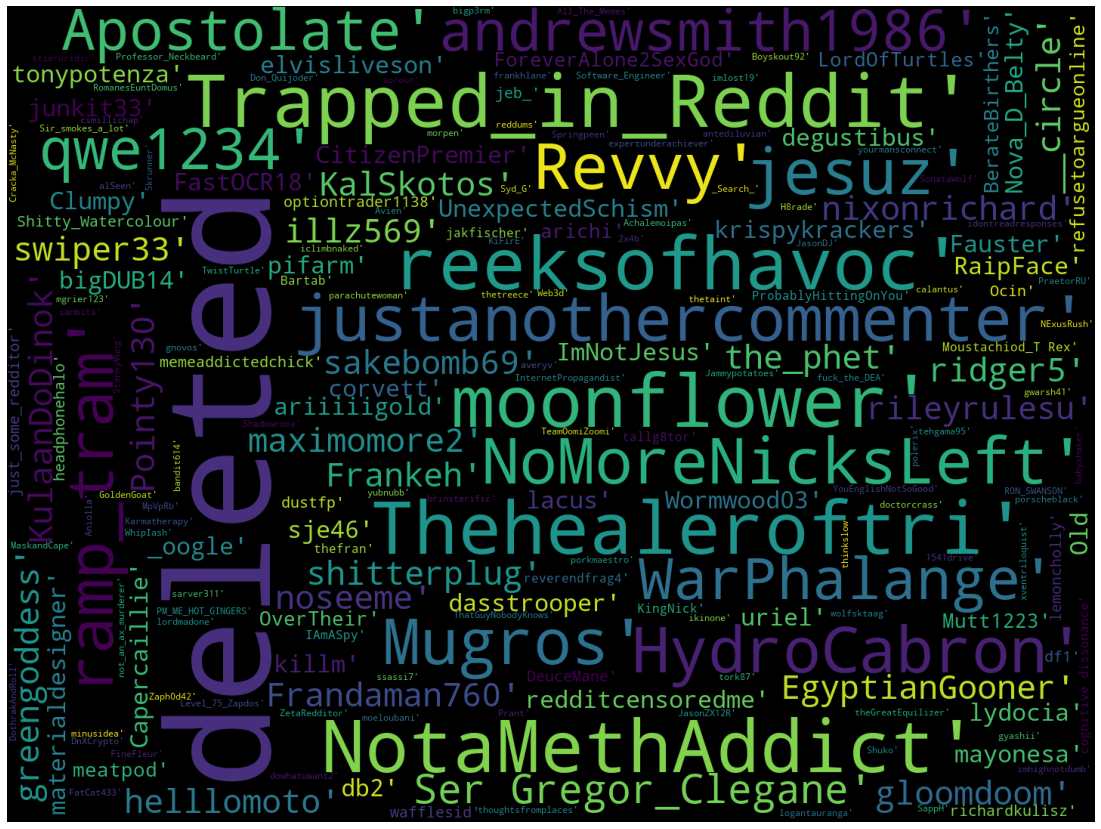

In [17]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# Parent Text Word Cloud

In [19]:
train_qs1 = pd.Series(df['parent_text'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

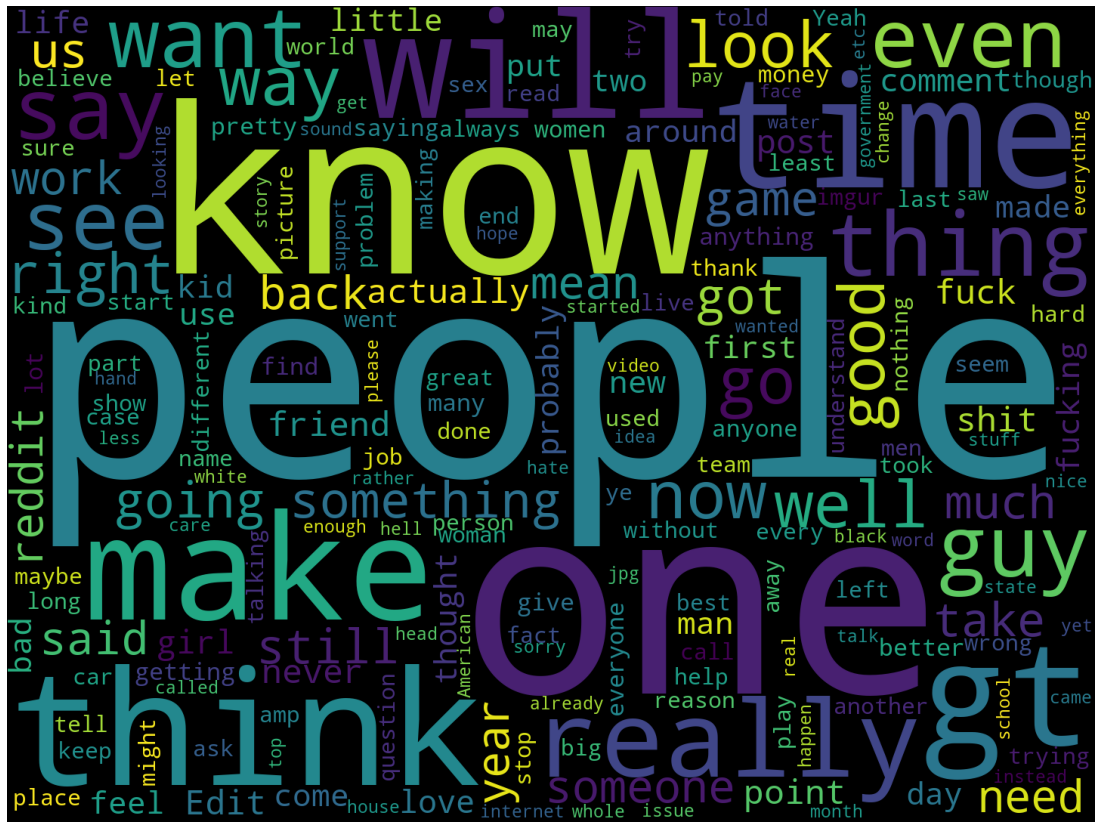

In [20]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs1.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# Parent Author's Word cloud

In [21]:
train_qs2 = pd.Series(df['parent_author'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

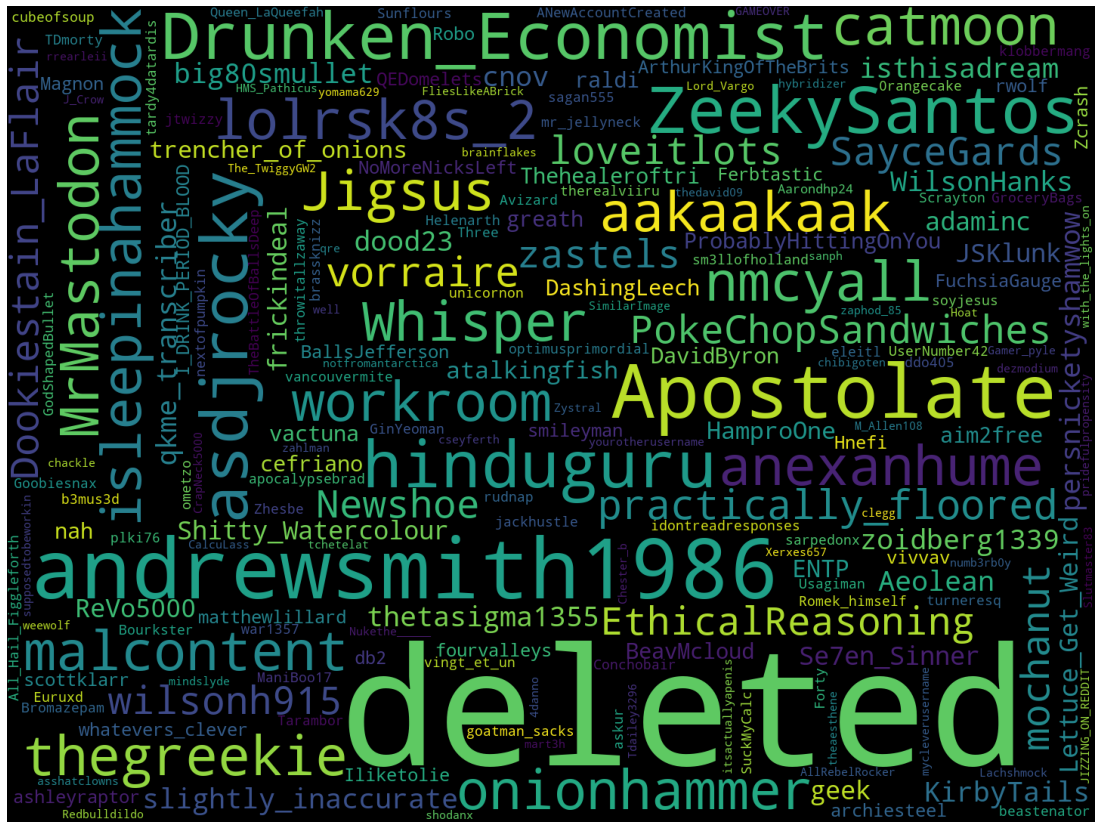

In [22]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs2.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# Our Text word cloud

In [23]:
train_qs3 = pd.Series(df['text'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

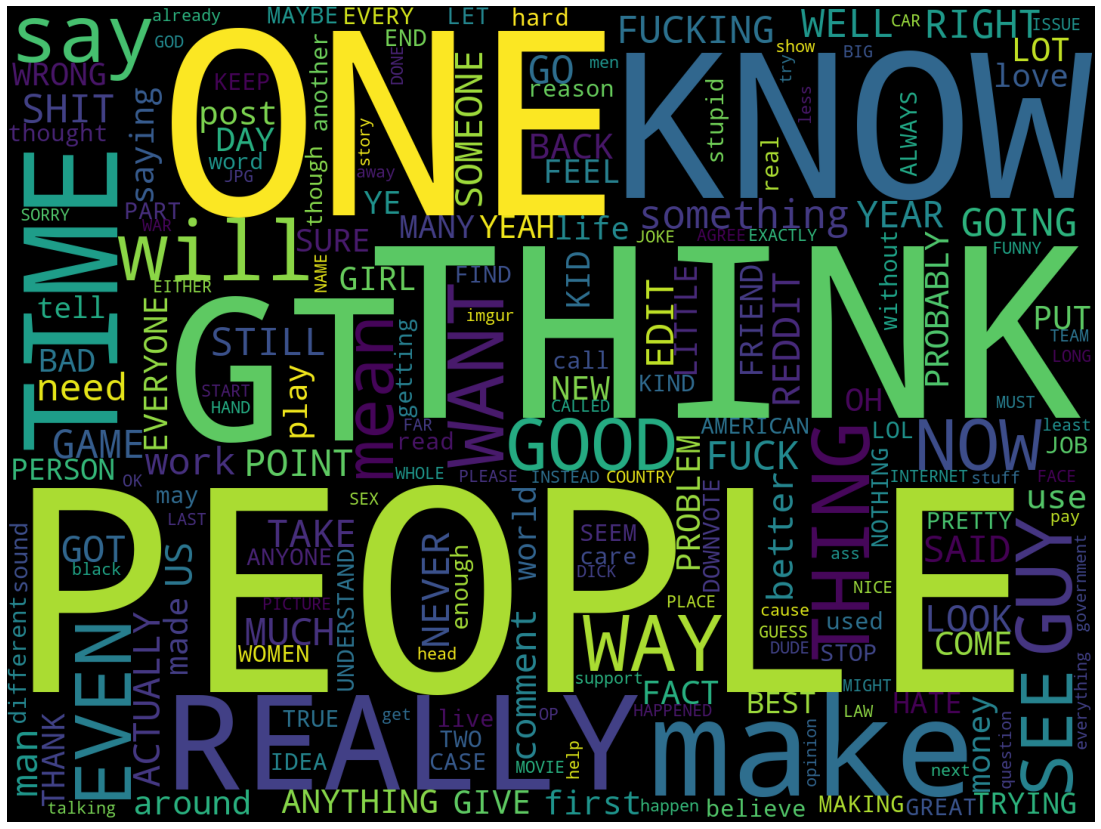

In [24]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs3.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

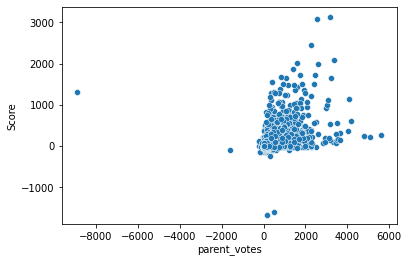

In [26]:
sns.scatterplot(x=df['parent_votes'],y=df['Score'],data=df)

In [47]:
df.drop(columns=['author','controversiality','parent_text','parent_score','parent_votes','parent_author','parent_controversiality'],inplace=True)

In [48]:
df.head()

,text,Score
0,i must be retarded i thought it meant con lawl...,-8
1,DOWNMODDED FOR IRRELEVANCE? ISN'T THAT HOW THI...,-16
2,"THAT WAS SUPPOSED TO MEAN "" BY A PLACE WHERE P...",-7
3,I THOUGHT EVERYONE DID; ITS FUCKING DELICIOUS :\,67
4,"Great work, Zhesbe! I'd give you a raise but y...",1348


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

# We will use text hero library for easy cleaning of data

In [35]:
!pip install texthero

     |████████████████████████████████| 1.5MB 4.4MB/s 
     |████████████████████████████████| 245kB 12.7MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [36]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
df['pca'] = (
   df['text']
   .pipe(hero.clean)
   .pipe(hero.tfidf)###vectorizing
   .pipe(hero.pca)
)

In [50]:
df.head()


,text,Score,pca
0,i must be retarded i thought it meant con lawl...,-8,"[-0.007840664763254, -0.011414426727178595]"
1,DOWNMODDED FOR IRRELEVANCE? ISN'T THAT HOW THI...,-16,"[0.0038418666995482863, -0.006093853475306527]"
2,"THAT WAS SUPPOSED TO MEAN "" BY A PLACE WHERE P...",-7,"[-0.03313676426996228, -0.035136695197525145]"
3,I THOUGHT EVERYONE DID; ITS FUCKING DELICIOUS :\,67,"[-0.012989833334206788, 0.0014105155120350808]"
4,"Great work, Zhesbe! I'd give you a raise but y...",1348,"[-0.004804561718625586, -0.013202257411831687]"


In [58]:
df.drop(columns=['text','pca'],inplace=True)

In [51]:
df1=hero.clean(df['text'])

In [59]:
dff=pd.concat([df1,df],axis=1)

In [60]:
dff.head()

,text,Score
0,must retarded thought meant con lawl oh well work,-8
1,downmodded irrelevance works,-16
2,supposed mean place people undoubtedly snake b...,-7
3,thought everyone fucking delicious \,67
4,great work zhesbe give raise seem handled,1348


In [67]:
vector=TfidfVectorizer(lowercase=False)

In [68]:
vector.fit(dff)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [70]:
y=dff.Score
x=vector.fit_transform(dff.text)

In [71]:
from sklearn.tree import DecisionTreeRegressor
tr=DecisionTreeRegressor()

In [72]:
tr.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
import numpy as np

In [75]:
pr=tr.predict(x)

In [76]:
np.sqrt(mean_squared_error(pr,y))

21.08987549124731

In [77]:
import lightgbm

In [78]:
lg=lightgbm.LGBMRegressor()

In [79]:
lg.fit(x,y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [80]:
pl=lg.predict(x)

In [81]:
np.sqrt(mean_squared_error(pl,y))


168.5831957552545

# TEST DATA

In [82]:
df2=pd.read_csv('/content/Test_Data (3).csv')

In [83]:
df2.drop(columns=['author','controversiality','parent_text','parent_score','parent_votes','parent_author','parent_controversiality'],inplace=True)


In [84]:
df2.head()

,text
0,Big deal. He once fought in the Napoleonic war...
1,"I don't think the animal cares, either way, it..."
2,&GT; IT'S FAIRLY OBVIOUS YOU HAVE AN AGENDA HE...
3,It's probably due to their skin looking supple...
4,kendrick lamar. he's like a poverty lupe fiasc...


In [85]:
df2.shape

(1015, 1)

In [87]:
df2['pca'] = (
   df2['text']
   .pipe(hero.clean)
   .pipe(hero.tfidf)###vectorizing
   .pipe(hero.pca)
)

In [88]:
df2.head()

,text,pca
0,Big deal. He once fought in the Napoleonic war...,"[-0.007583465246032373, 0.061464291085791795]"
1,"I don't think the animal cares, either way, it...","[-0.023703023906300903, -0.010735535780168748]"
2,&GT; IT'S FAIRLY OBVIOUS YOU HAVE AN AGENDA HE...,"[-0.019821204369869835, -0.011337027930424676]"
3,It's probably due to their skin looking supple...,"[-0.010763382762873976, -0.05875394358860367]"
4,kendrick lamar. he's like a poverty lupe fiasc...,"[-0.018973373706787186, -0.034293928891767037]"


In [90]:
df2.drop(columns=['text'],inplace=True)

In [89]:
dff2=hero.clean(df2['text'])

In [91]:
ddf=pd.concat([df2,dff2],axis=1)


In [93]:
ddf.head()
ddf.drop(columns=['pca'],inplace=True)

In [94]:
ddf.head()

,text
0,big deal fought napoleonic wars practically im...
1,think animal cares either way dead
2,gt fairly obvious agenda right agenda prevent ...
3,probably due skin looking supple like tanned l...
4,kendrick lamar like poverty lupe fiasco better...


In [95]:
vector.transform(ddf)

<1x14564 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [96]:
x1=vector.transform(ddf.text)

In [97]:
pred=tr.predict(x1)

In [98]:
pred

array([ 88., -22.,  -9., ...,  -9., -12.,  68.])

In [99]:
pred.shape

(1015,)

In [100]:
my=pd.DataFrame({'prediction':pred})

In [101]:
my.to_csv('nlp_pred.csv')

In [102]:
from google.colab import files

In [103]:
files.download('nlp_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>